In [5]:
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa

In [2]:
fsensor="/scratch/ICE-CUBE/sensor_geometry.csv"
fbatch={'1':"/scratch/ICE-CUBE/batch_1.parquet"}
fmeta="/scratch/ICE-CUBE/train_meta.parquet"

In [3]:
sensorgeom = pd.read_csv(fsensor).set_index("sensor_id").to_dict()
batch= pd.read_parquet(fbatch['1']).query("(event_id%100==0) & (auxiliary==False)")

In [15]:
metapq=ParquetFile(fmeta)
first_ten_rows = next(metapq.iter_batches(batch_size = 185806))

meta=pa.Table.from_batches([first_ten_rows]).to_pandas() 

In [8]:
#Map x,y,z to sensor_id in batch

def getx(sensorid):
    return sensorgeom['x'][sensorid]
def gety(sensorid):
    return sensorgeom['y'][sensorid]
def getz(sensorid):
    return sensorgeom['z'][sensorid]

batch['x']=batch['sensor_id'].apply(getx)
batch['y']=batch['sensor_id'].apply(gety)
batch['z']=batch['sensor_id'].apply(getz)

In [9]:
batch.head()

,sensor_id,time,charge,auxiliary,x,y,z
event_id,,,,,,,
2800,1154,9873,0.875,False,326.85,-209.07,260.13
2800,1155,10003,0.775,False,326.85,-209.07,243.11
2800,1157,10041,1.025,False,326.85,-209.07,209.07
2800,1156,10100,0.225,False,326.85,-209.07,226.09
2800,1160,10349,1.275,False,326.85,-209.07,158.01


In [108]:
batch['time']=batch['time'].groupby('event_id').transform(lambda x: (x - x.min()) / x.max())
batch['charge']=batch['charge'].groupby('event_id').transform(lambda x: (x - x.min()) / x.max())
batch.head()

,sensor_id,time,charge,auxiliary,x,y,z
event_id,,,,,,,
2800,1154,0.000000,0.337662,False,326.85,-209.07,260.13
2800,1155,0.048634,0.285714,False,326.85,-209.07,243.11
2800,1157,0.062851,0.415584,False,326.85,-209.07,209.07
2800,1156,0.084923,0.000000,False,326.85,-209.07,226.09
2800,1160,0.178077,0.545455,False,326.85,-209.07,158.01


In [ ]:
batch.head()

In [103]:
normalized_df=(df-df.min())/(df.max()-df.min())

df.head()

ValueError: Unable to coerce to Series, length must be 7: given 1994

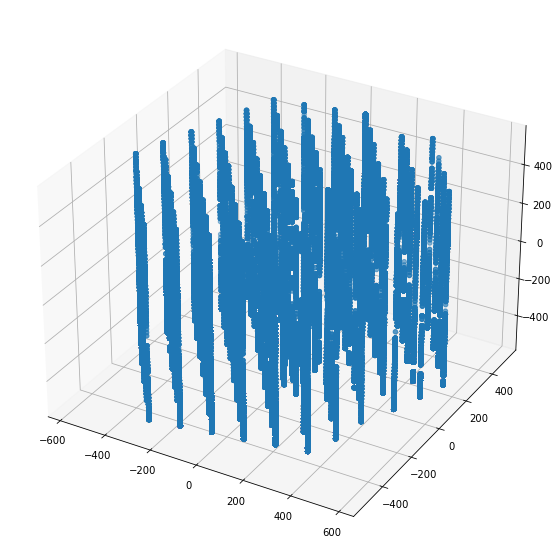

In [11]:
import matplotlib.pyplot as plt
threedee = plt.figure(figsize=(10, 10)).gca(projection='3d')
threedee.scatter(batch['x'],batch['y'],batch['z'])
plt.show()


In [121]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_events(batch,events,meta,sc=100,msc=20):
    
    import numpy as np
    fig, axes = plt.subplots(nrows=len(events), ncols=1, subplot_kw={'projection': '3d'},figsize=(10,50))
    axes=axes.flatten()
    for i, ax in enumerate(axes):
        event="event_id=="+str(events[i])
        zenith=meta.query(event)['zenith'].values[0]
        azimuth=meta.query(event)['azimuth'].values[0]
        x_fin=np.sin(zenith)*np.cos(azimuth)
        y_fin=np.sin(zenith)*np.sin(azimuth)
        z_fin=np.cos(zenith)
        print(type(x))
        # check for case when two rows have same max charge
        event_maxcharge_idx=batch.loc[events[i]]['charge'].idxmax()
        x_ini=batch.loc[event_maxcharge_idx]['x'].values[0]
        y_ini=batch.loc[event_maxcharge_idx]['y'].values[0]
        z_ini=batch.loc[event_maxcharge_idx]['z'].values[0]
        
        x_a=np.linspace(x_ini,x_ini+x_fin*sc, num=50)
        y_a=np.linspace(y_ini,y_ini+y_fin*sc, num=50)
        z_a=np.linspace(z_ini,z_ini+z_fin*sc, num=50)
        
        ax.scatter(batch.loc[events[i]]['x'],batch.loc[events[i]]['y'],batch.loc[events[i]]['z'],s=msc*batch.loc[events[i]]['charge'],c=batch.loc[events[i]]['time'],
                  cmap='viridis_r')
        #ax.set_xlim(-500,500)
        #ax.set_ylim(-500,500)
        #ax.set_zlim(-500,500)
        ax.scatter(x_a,y_a,z_a,c='red',s=10)
        #ax.scatter([x],[y],[z],c='red',s=10)
        #ax.scatter([0],[0],[0],c='red',s=10)
    plt.show()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


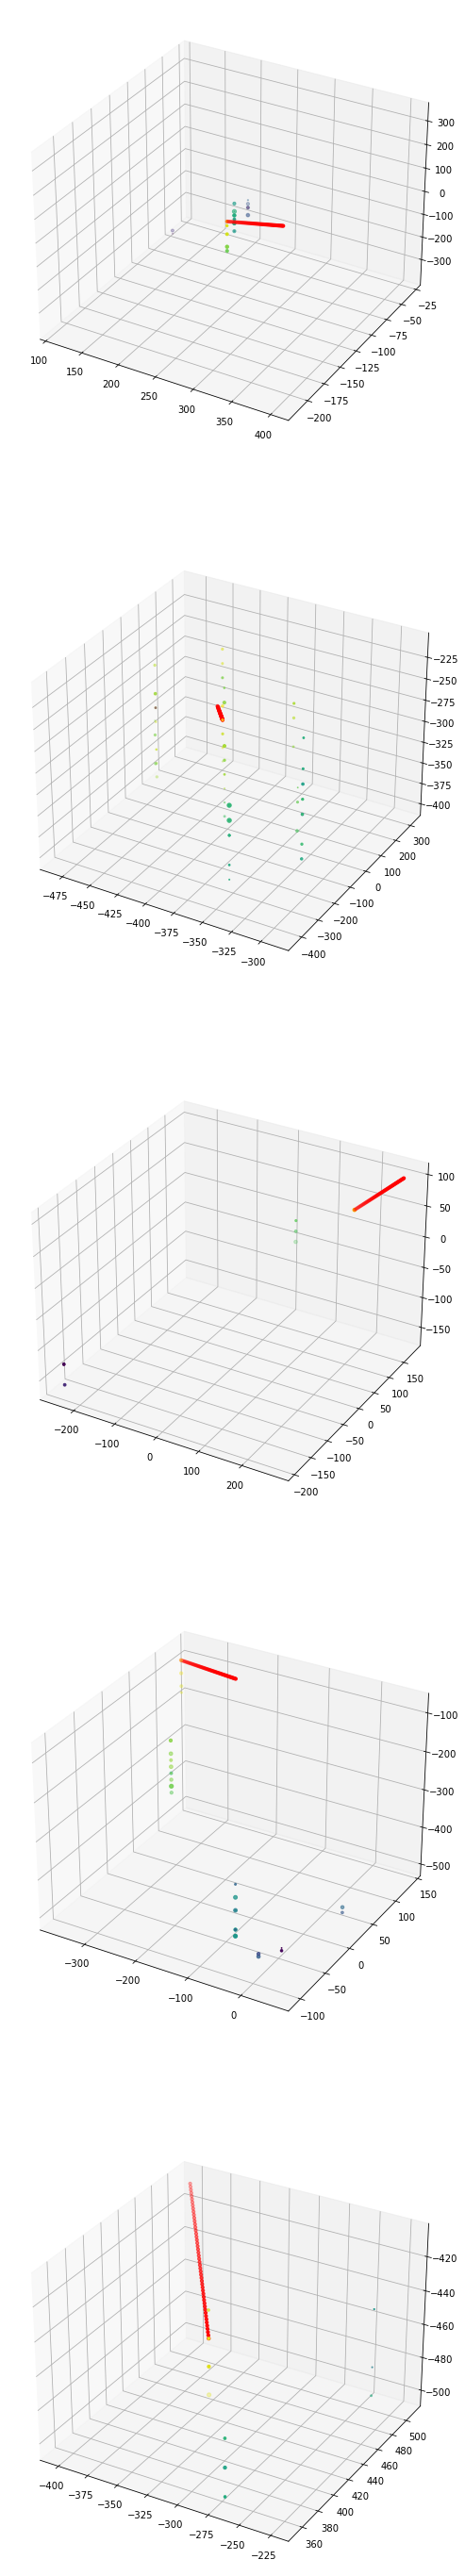

In [122]:
plot_events(batch,list(batch.index.unique())[:5],meta)


### Important link
https://icecube.wisc.edu/science/icecube/

In [89]:
len(batch)

185806

In [ ]:
litup=[len(batch.loc[event]) for event in list(batch.index.unique())]

In [ ]:
185806/2000

In [ ]:
batch.groupby("event_id").hist()

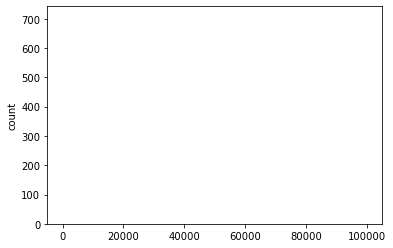

In [18]:
import numpy as np
import random
from matplotlib import pyplot as plt

litup=[len(batch.loc[event]) for event in list(batch.index.unique())]

bins = np.arange(0, 100000, 10) # fixed bin size

plt.hist(litup, bins=bins, alpha=0.5)
plt.ylabel('count')
plt.show()

In [19]:
batch.loc[49000]

,sensor_id,time,charge,auxiliary,x,y,z
event_id,,,,,,,
49000,993,9877,1.125,False,-43.27,-267.52,-61.56
49000,995,9892,0.825,False,-43.27,-267.52,-95.60
49000,994,9898,1.675,False,-43.27,-267.52,-78.58
49000,993,9912,1.525,False,-43.27,-267.52,-61.56
49000,993,9922,1.075,False,-43.27,-267.52,-61.56
...,...,...,...,...,...,...,...
49000,2570,24926,0.775,False,-279.53,23.17,-348.43
49000,408,25720,0.925,False,-334.80,-424.50,-316.40
49000,3540,25917,0.875,False,-437.04,217.80,501.47


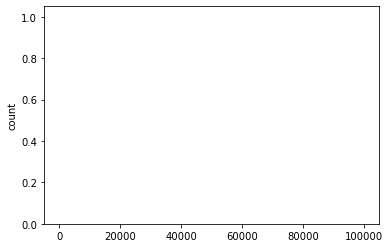

In [20]:
import numpy as np
import random
from matplotlib import pyplot as plt

litup=[len(batch.loc[event]) for event in [49000]]

bins = np.arange(0, 100000, 5) # fixed bin size

plt.hist(litup, bins=bins, alpha=0.5)
plt.ylabel('count')
plt.show()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


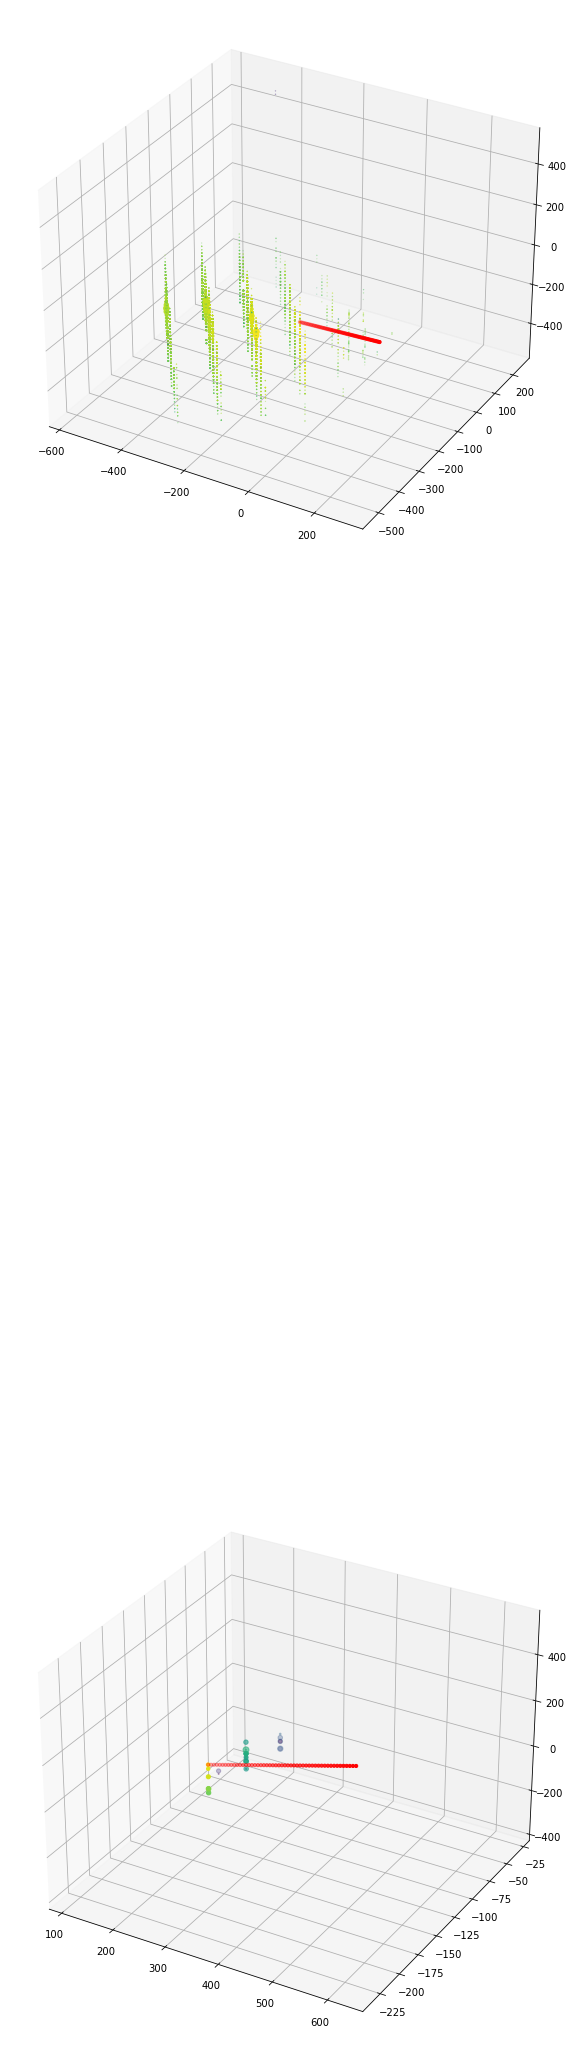

In [126]:
plot_events(batch,[49000,2800],meta,sc=400,msc=40)

In [17]:
meta.query("event_id==49000")

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
3035,1,49000,498632,521524,5.881623,1.087581


In [74]:

event="event_id==49000"
x=np.sin(meta.query(event)['zenith'])*np.cos(meta.query(event)['azimuth'])
y=np.sin(meta.query(event)['zenith'])*np.sin(meta.query(event)['azimuth'])
z=np.cos(meta.query(event)['zenith'])

In [75]:
x,y,z

(3035    0.815065
 dtype: float64,
 3035   -0.346106
 dtype: float64,
 3035    0.464628
 Name: zenith, dtype: float64)

In [78]:
meta.query(event)['zenith'].values[0]

1.0875814102464656